![](https://www.securitymagazine.com/ext/resources/images/healthcare-banner.jpg?1607104673)

# Introduction

Predicting healthcare costs for individuals using accurate prediction models is important for various stakeholders beyond health insurers, and for various purposes. A few notable benefits of accurately predicting healthcare costs for insurance companies are determining fair and competitive premium rates, personalizing insurance plans, and optimizing resource allocation.

This notebook aims to:
- Find out how healthcare costs are driven by different variables, including age, sex, BMI, the number of children, smoking status, and region; and
- Develop a model to predict the healthcare costs based on such variables. 


# Data Preparation

In [1]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
df = pd.read_csv('/kaggle/input/healthcare-insurance/insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [2]:
# Check for duplicates and drop them if any
print('Number of duplicates: ',df.duplicated().sum())
if df.duplicated().sum()>0:
    print('Dataset after removing duplicates:')
    df = df.drop(df[df.duplicated()==1].index, axis=0) 

Number of duplicates:  1
Dataset after removing duplicates:


In [3]:
# Check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Truncate BMI and charges
df['bmi'] = np.trunc(10 * df['bmi']) / 10
df['charges'] = np.trunc(100 * df['charges']) / 100
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.7,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.8,0,no,northwest,3866.85


# Exploratory Data Analysis

### Distribution of categorical variables

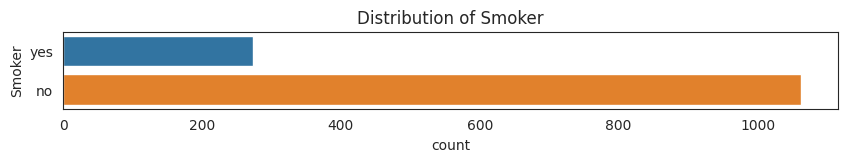

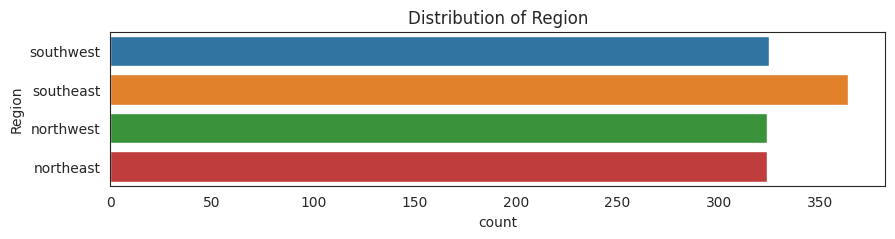

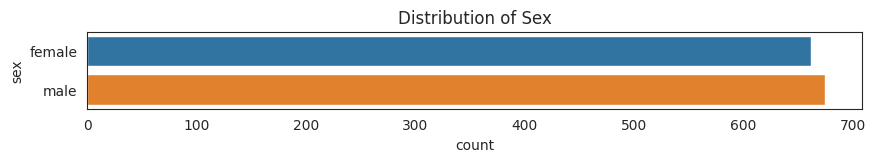

In [6]:
plt.figure(figsize=(10,1))
sns.countplot(df,y='smoker')
plt.title('Distribution of Smoker')
plt.ylabel('Smoker')

plt.figure(figsize=(10,2))
sns.countplot(df,y='region')
plt.title('Distribution of Region')
plt.ylabel('Region')

plt.figure(figsize=(10,1))
sns.countplot(df,y='sex')
plt.title('Distribution of Sex')
plt.ylabel('sex')
plt.show()

### Distribution of numerical variables and their linear relationships

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

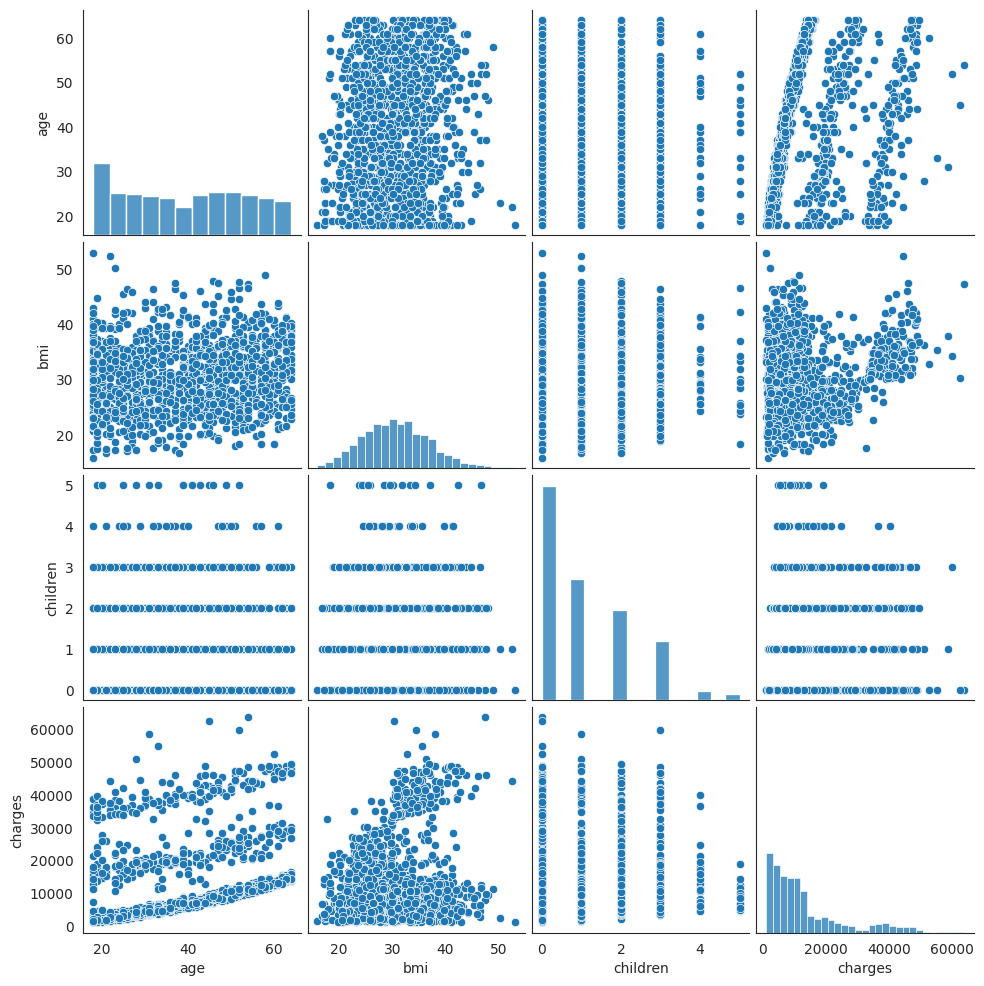

In [7]:
sns.pairplot(df)
plt.show()

Charges has a low correlation with Age, BMI, and Number of children, respectively. We can calculate the correlation among them.

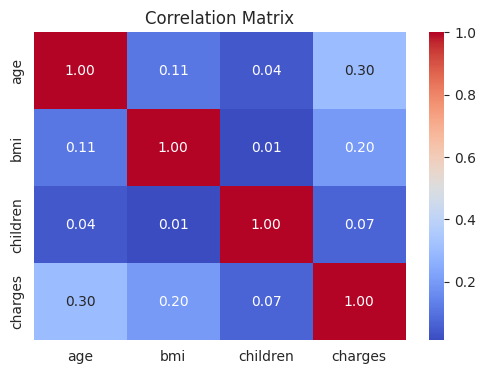

In [8]:
# Correlation matrix
plt.figure(figsize=(6, 4))
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Now we should look at the relationship between Charges and each categorical variable.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


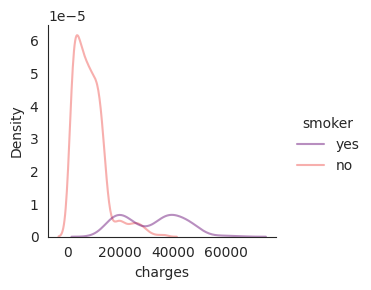

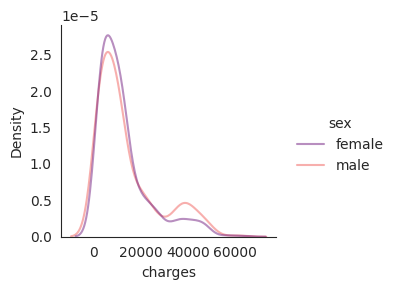

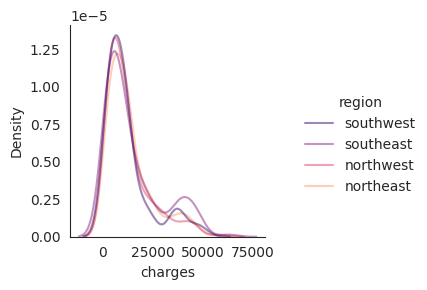

In [9]:
# Plot charges by ages and smoking status
sns.displot(x="charges", hue="smoker", kind='kde',
            alpha=.5, palette="magma", height=3,
            data=df)
sns.displot(x="charges", hue="sex", kind='kde',
            alpha=.5, palette="magma", height=3,
            data=df)
sns.displot(x="charges", hue="region", kind='kde',
            alpha=.5, palette="magma", height=3,
            data=df)
plt.show()

Smoking status has an impact on Charges, while Region and Sex do not.

Now, we group the numerical and catgorical variables to see their collective affect on Charges.

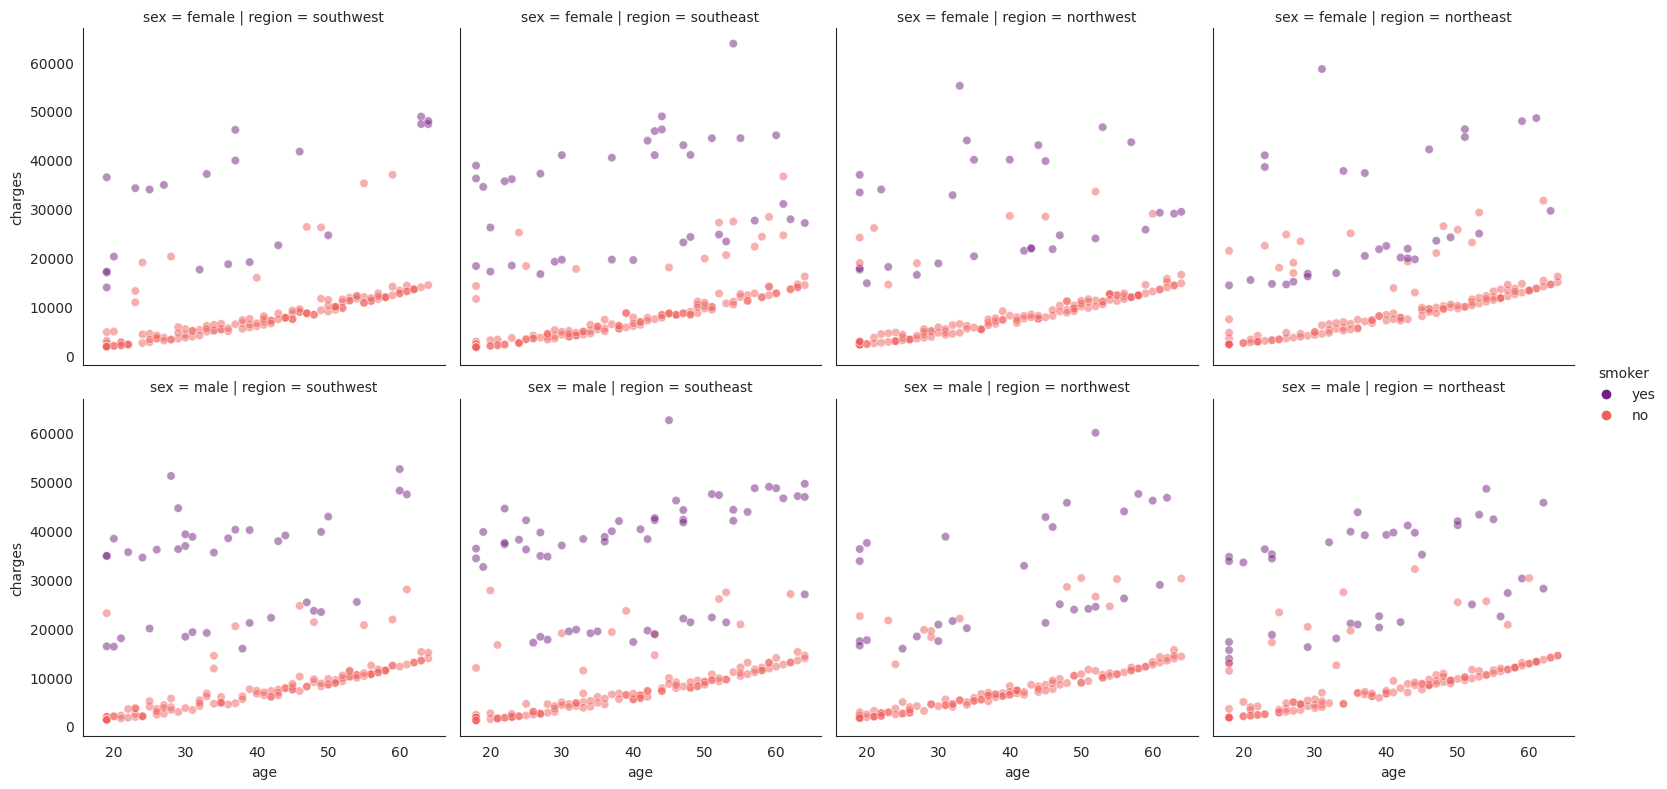

In [10]:
sns.relplot(data=df,x='age',y='charges',
           hue='smoker',row='sex', col='region',
           alpha=0.5, palette='magma', height=4)
plt.show()

Except for Smoking status, Sex and Region do not make a big difference to Charges.

### Insights:
- Smoking affects healthcare costs, with smokers have higher healthcare costs than non-smokers.
- Smokers tend to have higher BMI than non-smokers, which worsen their healthcare costs.
- People with more children consist of mainly non-smokers. However, the causal relationship between the number of children and smoking status cannot be determined through this dataset.
- Location, age, and sex do not significantly affect healthcare costs.